### 梯度下降算法拟合直线

In [20]:
from numpy import *
# 数据集大小 即20个数据点
m = 20
# x的坐标以及对应的矩阵
X0 = ones((m, 1))  # 生成一个m行1列的向量，也就是x0，全是1
X1 = arange(1, m+1).reshape(m, 1)  # 生成一个m行1列的向量，也就是x1，从1到m
X = hstack((X0, X1))  # 按照列堆叠形成数组，其实就是样本数据
# 对应的y坐标
Y = np.array([
    3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
    11, 13, 13, 16, 17, 18, 17, 19, 21
]).reshape(m, 1)
# 学习率
alpha = 0.01

In [17]:
import pandas as pd
pd.DataFrame(hstack((X,y)),columns=[['X0','X1','y']]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
X0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
X1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
y,3.0,4.0,5.0,5.0,2.0,4.0,7.0,8.0,11.0,8.0,12.0,11.0,13.0,13.0,16.0,17.0,18.0,17.0,19.0,21.0


In [18]:
# 定义代价函数
def cost_function(theta, X, Y):
    diff = dot(X, theta) - Y  # dot() 数组需要像矩阵那样相乘，就需要用到dot()
    return (1/(2*m)) * dot(diff.transpose(), diff)


# 定义代价函数对应的梯度函数
def gradient_function(theta, X, Y):
    diff = dot(X, theta) - Y
    return (1/m) * dot(X.transpose(), diff)

# 梯度下降迭代
def gradient_descent(X, Y, alpha):
    theta = array([1, 1]).reshape(2, 1)
    gradient = gradient_function(theta, X, Y)
    while not all(abs(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = gradient_function(theta, X, Y)
    return theta

In [24]:
optimal = gradient_descent(X, Y, alpha)
print('optimal:', optimal)
print('cost function:', cost_function(optimal, X, Y)[0][0])

optimal: [[0.51583286]
 [0.96992163]]
cost function: 1.014962406233101


In [28]:
# 根据数据画出对应的图像
def plot(X, Y, theta):
    import matplotlib.pyplot as plt
    ax = plt.subplot(111)  # 这是我改的
    ax.scatter(X, Y, s=30, c="red", marker="s")
    plt.xlabel("X")
    plt.ylabel("Y")
    x = arange(0, 21, 0.2)  # x的范围
    y = theta[0] + theta[1]*x
    ax.plot(x, y)
    return plt

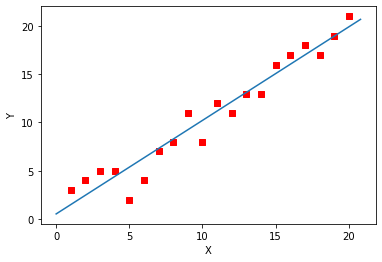

In [29]:
plt = plot(X1, Y, optimal)

### 假设要优化一个函数 $y=f(x)=0.5*(x-0.25)^2$

0.0000000000


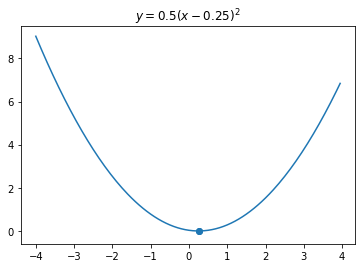

In [33]:
#定义函数
def f(x):
    return 0.5 * (x - 0.25)**2
#f(x)的导数(现在只有一元所以是导数，如果是多元函数就是偏导数)
def df(x):
    return x - 0.25 

alpha = 1 #你可以更改学习率试试其他值
GD_X = [] #每次x更新后把值存在这个列表里面
GD_Y = [] #每次更新x后目标函数的值存在这个列表里面
x = 1 #随机初始化的x,其他的值也可以
f_current = f_change = f(x)
iter_num = 0

while iter_num <100 and f_change > 1e-10: #迭代次数小于100次或者函数变化小于1e-10次方时停止迭代
    iter_num += 1
    x = x - alpha * df(x)
    tmp = f(x)
    f_change = abs(f_current - tmp)
    f_current = tmp
    GD_X.append(x)
    GD_Y.append(f_current)

print("{:.10f}".format(GD_Y[-1])) #无限接近0

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-4,4,0.05)
Y = f(X)
Y = np.array(Y)

plt.plot(X,Y)
plt.scatter(GD_X,GD_Y)
plt.title("$y = 0.5(x - 0.25)^2$")
plt.show()

### BGD，SGD，MBGD

In [85]:
import numpy as np
import pandas as pd

class regression:
    def __init__(self, data, intercept = True):
        self.X = np.mat(data.iloc[:,:-1].values)
        self.Y = np.mat(data.iloc[:,-1].values).T
        self.data = data
        self.intercept = intercept
    
    def BGDfit(self, lam, iternum):
        #This function aims to use batch gradient descent algorithm to get the minimum value
        theta = np.mat(np.zeros((self.X.shape[1], 1)))
        for _ in range(iternum):
            grad =  2 / self.X.shape[0] * (self.X.T * (self.X * theta - self.Y))
            theta -= lam * grad
        return np.ravel(theta)
        
    def SGDfit(self, lam, iternum):
        #This function aims to use stochastic gradient descent algorithm to get the minimum value
        theta = np.mat(np.zeros((self.X.shape[1], 1)))
        for _ in range(iternum):
            rnd_num = np.random.randint(self.X.shape[0])
            grad =  2 / self.X.shape[0] * (self.X[rnd_num].T * (self.X[rnd_num] * theta - self.Y[rnd_num]))
            theta -= lam * grad
        return np.ravel(theta)
        
    def MBGDfit(self, lam, iternum):
        #This function aims to use mini-batch gradient descent algorithm to get the minimum value
        theta = np.mat(np.zeros((self.X.shape[1], 1)))
        temp_X = pd.DataFrame(self.X)
        for _ in range(iternum):
            X_index = temp_X.sample(frac = 0.1, replace = False).index
            X_mini = self.X[X_index, :]
            Y_mini = self.Y[X_index]
            grad =  2 / X_mini.shape[0] * (X_mini.T * (X_mini * theta - Y_mini))
            theta -= lam * grad
        return np.ravel(theta)
        
    def evaluate(self, coef):
        #This function aims to calculate SSE and R2 in order to evaluate whether the model is accurate or not
        Y_pred = self.X * np.mat(coef).T
        SSE = np.power(np.ravel(self.Y) - np.ravel(Y_pred), 2).sum()
        SST = np.power(np.ravel(self.Y) - np.ravel(self.Y).mean(), 2).sum()
        R2 = 1 - SSE / SST
        return SSE, R2

#### boston price test dataset

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
"""
CRIM：城镇人均犯罪率。
ZN：住宅用地超过 25000 sq.ft. 的比例。
INDUS：城镇非零售商用土地的比例。
CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。
NOX：一氧化氮浓度。
RM：住宅平均房间数。
AGE：1940 年之前建成的自用房屋比例。
DIS：到波士顿五个中心区域的加权距离。
RAD：辐射性公路的接近指数。
TAX：每 10000 美元的全值财产税率。
PTRATIO：城镇师生比例。
B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。
LSTAT：人口中地位低下者的比例。
MEDV：自住房的平均房价，以千美元计。
预测平均值的基准性能的均方根误差（RMSE）是约 9.21 千美元。
重要参数
* return_X_y:表示是否返回target（即价格），默认为False，只返回data（即属性）。
"""
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [93]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
# boston
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
Y = pd.DataFrame(data=boston.target, columns=['MEDV'])
dataset=pd.concat([X,Y], axis=1, join_axes=[X.index])
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [97]:
dataset_test = dataset[['CRIM','RM','MEDV']]
df = (dataset_test-dataset_test.min())/(dataset_test.max()-dataset_test.min())
df.head()

,CRIM,RM,MEDV
0,0.000000,0.577505,0.422222
1,0.000236,0.547998,0.368889
2,0.000236,0.694386,0.660000
3,0.000293,0.658555,0.631111
4,0.000705,0.687105,0.693333


#### main

In [100]:
test = regression(df)
coef = test.BGDfit(1,1000)

In [101]:
test.evaluate(coef)

(9.930417063724356, 0.5292406713019611)

### TensortFlow Gradient Descent

In [ ]:
import tensorflow as tf
 
# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)
 
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
    sess.run(train, {x: x_train, y: y_train})
    
# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))